## Sattellite Image classification

#### Import necessary libraries

In [6]:
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

#### Fetch the training Data

In [7]:
pwd

'C:\\Users\\Pakistan\\Desktop\\NIVEDITHA\\Deep learning course notes\\Deep learning course notes\\9. Capstone project\\Satellite image classification\\data'

In [8]:
import glob

In [9]:
cloudy = glob.glob('cloudy/*.jpg')
desert = glob.glob('desert/*.jpg')
green_area = glob.glob('green_area/*.jpg')
water = glob.glob('water/*.jpg')

In [10]:
water

['water\\SeaLake_1.jpg',
 'water\\SeaLake_1362.jpg',
 'water\\SeaLake_1469.jpg',
 'water\\SeaLake_1470.jpg',
 'water\\SeaLake_1473.jpg',
 'water\\SeaLake_1475.jpg',
 'water\\SeaLake_1479.jpg',
 'water\\SeaLake_1481.jpg',
 'water\\SeaLake_1484.jpg',
 'water\\SeaLake_1485.jpg',
 'water\\SeaLake_1489.jpg',
 'water\\SeaLake_1492.jpg',
 'water\\SeaLake_1493.jpg',
 'water\\SeaLake_1497.jpg',
 'water\\SeaLake_1498.jpg',
 'water\\SeaLake_1502.jpg',
 'water\\SeaLake_1504.jpg',
 'water\\SeaLake_1505.jpg',
 'water\\SeaLake_1506.jpg',
 'water\\SeaLake_1507.jpg',
 'water\\SeaLake_1510.jpg',
 'water\\SeaLake_1511.jpg',
 'water\\SeaLake_1657.jpg',
 'water\\SeaLake_1659.jpg',
 'water\\SeaLake_1661.jpg',
 'water\\SeaLake_1665.jpg',
 'water\\SeaLake_1666.jpg',
 'water\\SeaLake_1667.jpg',
 'water\\SeaLake_1672.jpg',
 'water\\SeaLake_1674.jpg',
 'water\\SeaLake_1676.jpg',
 'water\\SeaLake_1679.jpg',
 'water\\SeaLake_1680.jpg',
 'water\\SeaLake_1686.jpg',
 'water\\SeaLake_1688.jpg',
 'water\\SeaLake_1691.j

#### Find the number of images of all classes in the Training set

In [11]:
print(f'Number of cloudy images {len(cloudy)}')
print(f'Number of desert images {len(desert)}')
print(f'Number of green area images {len(green_area)}')
print(f'Number of water images {len(water)}')

Number of cloudy images 511
Number of desert images 521
Number of green area images 545
Number of water images 548


#### Store all the images inside a list and create a list with the corresponding labels

#### For Training set

In [12]:
image = []
label = []

for i in cloudy:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in desert:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in green_area:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in water: 
    img = plt.imread(i)
    image.append(img)
    label.append(3)


#### Shuffle both image list and label list 

##### Use shuffle function from sklearn utils

In [13]:
from sklearn.utils import shuffle

In [14]:
image, label = shuffle(image, label, random_state=100)

In [15]:
len(label)

2125

#### Plot a few images from our shuffled list with its corresponding label 

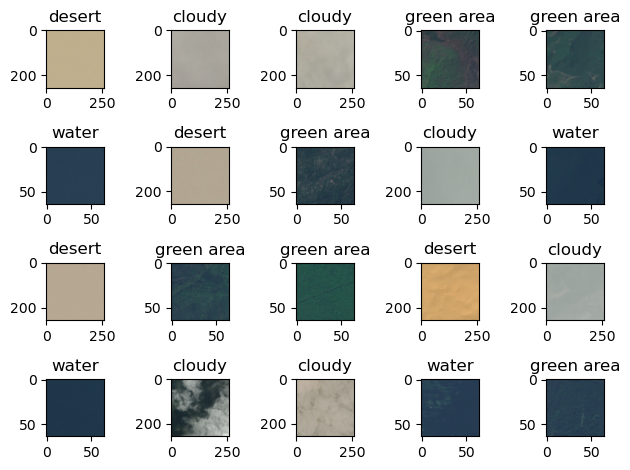

In [16]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])

    if label[i] == 0:
        plt.title('cloudy')
    elif label[i] == 1: 
        plt.title('desert')
    elif label[i] == 2:
        plt.title('green area')
    else:
        plt.title('water')
    plt.tight_layout()

#### Check the shape of the first 10 images 

In [17]:
for i in range(10): 
    print(image[i].shape)

(256, 256, 3)
(256, 256, 4)
(256, 256, 4)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(256, 256, 4)
(64, 64, 3)


#### Reshape the images

Also reassign them to new variables named X

In [18]:
from skimage.transform import resize

In [19]:
x = []
for i in image: 
    x.append(resize(i,(256,256,3)))
x = np.array(x)

#### create numpy arrays named y

In [22]:
y = np.array(label)

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.1)

#### Plot some of our reshaped images

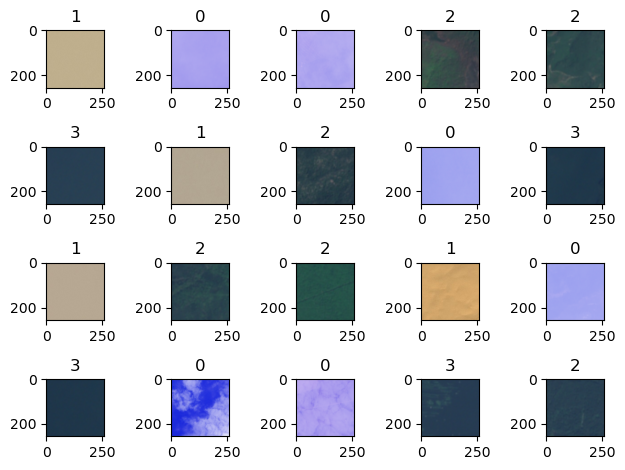

In [20]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x[i])
    plt.title(label[i])
    plt.tight_layout()

#### Check the shape of X_train and X_test and y_train and y_test

In [24]:
print(f'Shape of xtrain is:',xtrain.shape)
print(f'Shape of xtest is:',xtest.shape)
print(f'Shape of ytrain is:',ytrain.shape)
print(f'Shape of ytest is:',ytest.shape)

Shape of xtrain is: (1912, 256, 256, 3)
Shape of xtest is: (213, 256, 256, 3)
Shape of ytrain is: (1912,)
Shape of ytest is: (213,)


#### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [25]:
from tensorflow import keras

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape = (256,256,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

C:\Users\Pakistan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Check the summary of our model

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877,924 (30.05 MB)

 Trainable params: 7,877,924 (30.05 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model.

In [29]:
model.fit(xtrain, ytrain, epochs = 15, validation_split = 0.1)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 452ms/step - accuracy: 0.5417 - loss: 1.6026 - val_accuracy: 0.8750 - val_loss: 0.2737
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.8535 - loss: 0.3280 - val_accuracy: 0.8750 - val_loss: 0.2392
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 436ms/step - accuracy: 0.9061 - loss: 0.2156 - val_accuracy: 0.8698 - val_loss: 0.2436
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 436ms/step - accuracy: 0.8688 - loss: 0.3013 - val_accuracy: 0.8854 - val_loss: 0.2151
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 430ms/step - accuracy: 0.9077 - loss: 0.1979 - val_accuracy: 0.9062 - val_loss: 0.1838
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.8943 - loss: 0.2926 - val_accuracy: 0.9062 - val_loss: 0.1778
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 428ms/step - accuracy: 0.9170 - loss: 0.1892 - val_accuracy: 0.8958 - val_loss: 0.1964
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 444ms/step - accuracy: 0.9360 - loss: 0.1569 - val_accu

#### Evaluate the model

In [30]:
model.evaluate(xtrain, ytrain)

60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9113 - loss: 0.1845


[0.17830483615398407, 0.9178870320320129]

#### Make predictions with X_test

In [31]:
ypred = model.predict(xtest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


#### Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [32]:
ypred = ypred.argmax(axis=1)

#### Plot X_test with label from our prediction

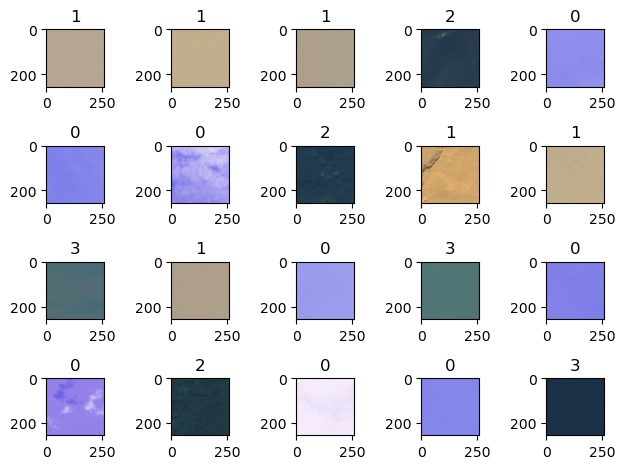

In [35]:
for i in range(20): 
    plt.subplot(4, 5, i+1)
    plt.imshow(xtest[i])
    plt.title(ypred[i])
plt.tight_layout()

#### Visualise confusion matrix on a heatmap

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

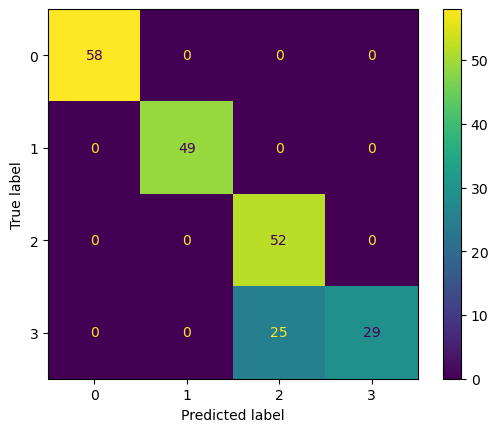

In [37]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)